In [ ]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn

In [ ]:
# define our simple NN model

class My_NN_Model(nn.Module):
    # implementation of our model

    def __init__(self, input_size, hidden_size, output_size):
        super(My_NN_Model, self).__init__()
        self.fc1= nn.Linear(input_size, hidden_size)   # fully connected layers
        self.fc2= nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x= self.fc1(x)
        x= self.fc2(x)

        return x

In [ ]:
model= My_NN_Model(3,4,2)

In [ ]:
data_point= torch.tensor([1, 2, 3], dtype=torch.float32)

model(data_point)

tensor([1.2226, 0.5458], grad_fn=<ViewBackward0>)

In [ ]:
# downloading the MNIST training and testing data
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data= datasets.MNIST(
    root= 'data',
    train= True,
    transform= ToTensor(),
    download= True,
)

test_data= datasets.MNIST(
    root= 'data',
    train= False,
    transform= ToTensor(),
)

In [ ]:
# print the shape of the data
print(train_data.data.shape)
print(train_data.targets.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


tensor(3)


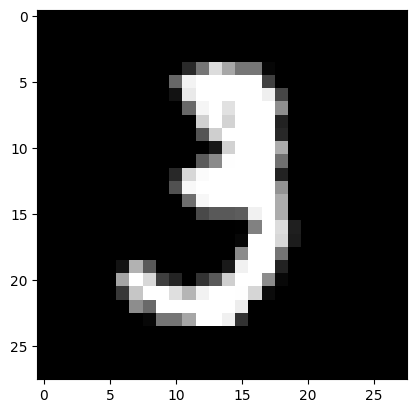

In [ ]:
# rendering a particular example
import matplotlib.pyplot as plt

i= 10
print(train_data.targets[i])
plt.imshow(train_data.data[i], cmap= 'gray')
plt.show()

In [ ]:
# define a NN model for the MNIST dataset

import torch.nn.functional as F

class My_NN_MNIST(nn.Module):
    def __init__(self):
        super(My_NN_MNIST, self).__init__()
        self.fc1= nn.Linear(784, 128)
        self.activation1= nn.ReLU()
        self.fc2= nn.Linear(128, 64)
        self.activation2= nn.ReLU()
        self.fc3= nn.Linear(64,10)

    def forward(self, x):
        x= torch.flatten(x)
        x= self.fc1(x)
        x= self.activation1(x)
        x= self.fc2(x)
        x= self.activation2(x)
        x= self.fc3(x)

        return F.log_softmax(x, dim=0)


In [ ]:
# training the model

import torch.optim as optim

# defining important stuff
model= My_NN_MNIST()
loss_fn= nn.CrossEntropyLoss() # used to calculate how wrong a particular prediction is
optimizer= torch.optim.SGD(model.parameters(), lr=1e-4)

losses= []

for (x, y) in zip(train_data.data, train_data.targets):
    # changing data type
    x= x.type(torch.float32)

    # asking the model to make a prediction
    y_pred= model.forward(x)

    # formating the target to e.g. [1,0,0,0,0,0,0,0,0,0]
    y= F.one_hot(y.type(torch.int64), 10).type(torch.float32)

    loss= loss_fn(y_pred, y)

    # backward pass (updating model based on gradients)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # keeping trach of loss
    losses.append(float(loss))

In [ ]:
# https://bayramblog.medium.com/backpropagation-the-heart-of-deep-learning-f2e1493882c9

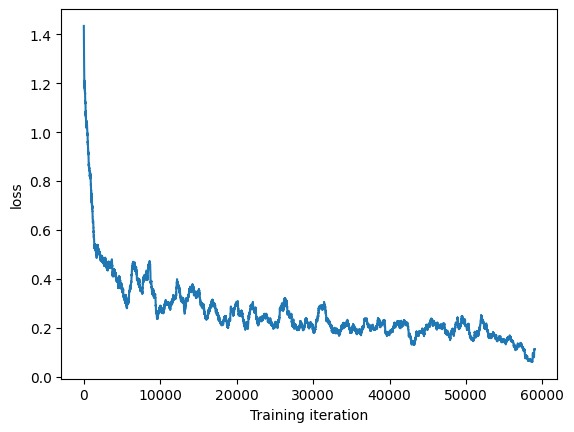

In [ ]:
# ploting the loss of individual samples

# this smooths out the trend of our loss data
def moving_avg(x, n):
    cumsum= np.cumsum(np.insert(x, 0, 0))
    return (cumsum[n:] - cumsum[:-n]) / float(n)

# ploting the loss over the training examples
plt.plot(moving_avg(losses, 1000))
plt.xlabel('Training iteration')
plt.ylabel('loss')
plt.show()

In [ ]:
# testing the model

num_true= 0
test_quant= 0

for (x_test, y_test) in zip(test_data.data, test_data.targets):
    # running a test example
    y_pred_test= model(x_test.type(torch.float32))

    # getting predicted value
    y_pred_test= torch.argmax(y_pred_test)

    # checking to see if the right value was predicted
    if bool(y_pred_test == y_test):
        num_true += 1

    test_quant += 1

print(f'Accuracy %:')
print((num_true/test_quant)*100)

Accuracy %:
94.82000000000001


In [ ]:
# https://towardsdatascience.com/ai-for-the-absolute-novice-intuitively-and-exhaustively-explained-7b353a31e6d7